In [14]:
import pandas as pd
import numpy as np
ds= pd.read_csv('car_evaluation.csv', header=None)
print(ds.head())

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
ds.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [9]:
ds.sample(6)

,vhigh,vhigh.1,2,2.1,small,low,unacc
633,high,high,5more,4,med,med,acc
1539,low,med,3,2,small,med,unacc
1633,low,low,2,4,med,high,good
383,vhigh,low,4,2,big,low,unacc
14,vhigh,vhigh,2,4,big,low,unacc
1194,med,low,2,2,big,med,unacc


In [15]:
#ds.rename(columns=['buying','maint','doors','persons','lug_boot','safety','class'])
CN = ["Buying", "Maintanance", "Doors", "Persons", "Luggage_capacity", "Safety", "class"]
ds.columns = CN
CN

['Buying',
 'Maintanance',
 'Doors',
 'Persons',
 'Luggage_capacity',
 'Safety',
 'class']

In [16]:
ds.head()

,Buying,Maintanance,Doors,Persons,Luggage_capacity,Safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
N = ["Buying", "Maintanance", "Doors", "Persons", "Luggage_capacity", "Safety", "class"]
print("Counting the frequency of each categorical variable in the dataset")
for col in N:
    
    print(ds[col].value_counts())  

Counting the frequency of each categorical variable in the dataset
vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: Maintanance, dtype: int64
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
2       576
4       576
more    576
Name: Persons, dtype: int64
small    576
med      576
big      576
Name: Luggage_capacity, dtype: int64
low     576
med     576
high    576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [19]:
print(ds)

     Buying Maintanance  Doors Persons Luggage_capacity Safety  class
0     vhigh       vhigh      2       2            small    low  unacc
1     vhigh       vhigh      2       2            small    med  unacc
2     vhigh       vhigh      2       2            small   high  unacc
3     vhigh       vhigh      2       2              med    low  unacc
4     vhigh       vhigh      2       2              med    med  unacc
...     ...         ...    ...     ...              ...    ...    ...
1723    low         low  5more    more              med    med   good
1724    low         low  5more    more              med   high  vgood
1725    low         low  5more    more              big    low  unacc
1726    low         low  5more    more              big    med   good
1727    low         low  5more    more              big   high  vgood

[1728 rows x 7 columns]


In [21]:
print("Frequency of each ordinal data in the target column - class:")
ds['class'].value_counts()

Frequency of each ordinal data in the target column - class:


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [22]:
X = ds.drop(['class'], axis=1)

y = ds['class']
print("Feature vectors are:")
X.head()

Feature vectors are:


,Buying,Maintanance,Doors,Persons,Luggage_capacity,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [23]:
print("Target column is:")
y.head()

Target column is:


0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
print(X_train)


     Buying Maintanance  Doors Persons Luggage_capacity Safety
107   vhigh       vhigh  5more    more              big   high
901     med       vhigh      3       4            small    med
1709    low         low  5more       2              big   high
706    high         med      4       2              med    med
678    high         med      3       2              med    low
...     ...         ...    ...     ...              ...    ...
1130    med         med      3    more              med   high
1294    med         low  5more    more              big    med
860    high         low  5more    more              med   high
1459    low        high      4       2            small    med
1126    med         med      3    more            small    med

[1382 rows x 6 columns]


In [38]:
X_test


,Buying,Maintanance,Doors,Persons,Luggage_capacity,Safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low
...,...,...,...,...,...,...
100,vhigh,vhigh,5more,more,small,med
274,vhigh,med,4,2,med,med
1206,med,low,2,more,small,low
101,vhigh,vhigh,5more,more,small,high


In [39]:
y_train


107     unacc
901     unacc
1709    unacc
706     unacc
678     unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1382, dtype: object

In [32]:
print(y_test)

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
        ...  
100     unacc
274     unacc
1206    unacc
101     unacc
1084    unacc
Name: class, Length: 346, dtype: object


In [40]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [41]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ["Buying", "Maintanance", "Doors", "Persons", "Luggage_capacity", "Safety"])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [42]:
X["Persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [44]:
ds.loc[107]

Buying              vhigh
Maintanance         vhigh
Doors               5more
Persons              more
Luggage_capacity      big
Safety               high
class               unacc
Name: 107, dtype: object

In [45]:
X_train.loc[997]

Buying              2
Maintanance         4
Doors               4
Persons             1
Luggage_capacity    1
Safety              2
Name: 997, dtype: int32

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8179


In [ ]:
from sklearn.tree import export_graphviz

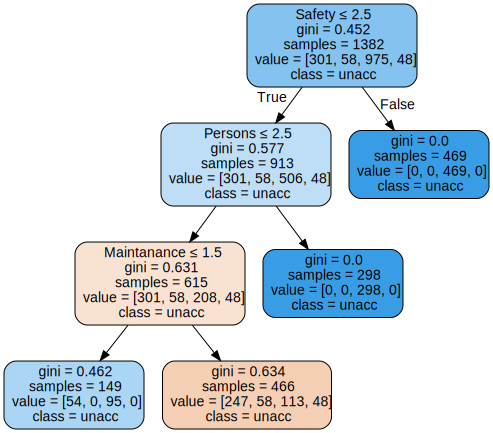

In [49]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [50]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(clf_gini.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

,Features,Importance
3,Persons,0.534
5,Safety,0.374
1,Maintanance,0.091
0,Buying,0.000
2,Doors,0.000
4,Luggage_capacity,0.000
